In [6]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [12]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # here i can use any model particularly for classification , segmentation and pos

100%|██████████| 6.25M/6.25M [00:00<00:00, 104MB/s]


**Working With Image from Directory**

In [13]:
import cv2
import torch

image_path = "/content/121bf36ccbbf00cb455238e3be77ea92.jpg"
image = cv2.imread(image_path)

results = model(image)


0: 448x640 7 persons, 1 bicycle, 1 car, 1 truck, 1 dog, 1 umbrella, 323.5ms
Speed: 19.8ms preprocess, 323.5ms inference, 27.8ms postprocess per image at shape (1, 3, 448, 640)


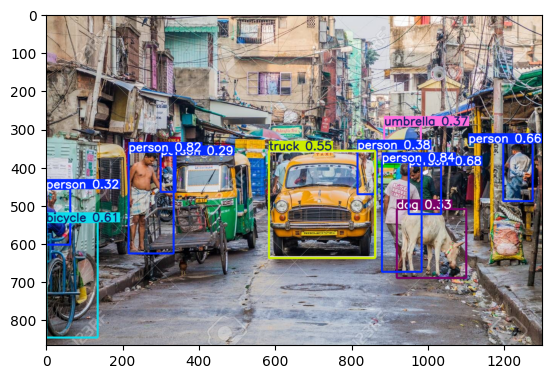

In [14]:
results[0].plot()
import matplotlib.pyplot as plt
plt.imshow(results[0].plot()[:,:,::-1])
plt.show()


**Working with Image from URL**

In [10]:
import requests
import cv2
import numpy as np

image_url = "https://c8.alamy.com/comp/FJ1P5P/busy-crowded-street-in-the-center-of-kolkata-india-FJ1P5P.jpg"  # Replace with actual image URL

response = requests.get(image_url)
image_arr = np.asarray(bytearray(response.content), dtype=np.uint8)

image = cv2.imdecode(image_arr, cv2.IMREAD_COLOR)

results = model(image)



0: 224x224 toyshop 0.52, jigsaw_puzzle 0.08, water_bottle 0.04, shoe_shop 0.04, grocery_store 0.03, 35.1ms
Speed: 29.7ms preprocess, 35.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


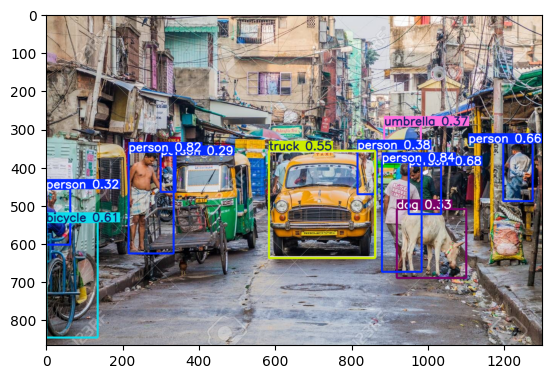

In [15]:
results[0].plot()
import matplotlib.pyplot as plt
plt.imshow(results[0].plot()[:,:,::-1])
plt.show()


**Working With Video From URL**

In [7]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

results = model.track("https://youtube.com/shorts/0QtaOz52YB0?si=UxlMgaD6pxOaDYKl", show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


1/1: https://youtube.com/shorts/0QtaOz52YB0?si=UxlMgaD6pxOaDYKl... Success ✅ (452 frames of shape 546x1080 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 640x352 3 persons, 5 cars, 1 truck, 150.2ms
0: 640x352 1 person, 1 car, 118.3ms
0: 640x352 1 person, 1 car, 1 truck, 98.6ms
0: 640x352 1 car, 1 truck, 106.9ms
0: 640x352 2 cars, 97.9ms
0: 640x352 1 person, 83.9ms
Speed: 2.4ms preprocess, 109.3ms inference, 

**Working With Video from Directory**

[youtube] Extracting URL: https://youtube.com/shorts/0QtaOz52YB0?si=UxlMgaD6pxOaDYKl
[youtube] 0QtaOz52YB0: Downloading webpage
[youtube] 0QtaOz52YB0: Downloading tv client config
[youtube] 0QtaOz52YB0: Downloading player 074a8365
[youtube] 0QtaOz52YB0: Downloading tv player API JSON
[youtube] 0QtaOz52YB0: Downloading ios player API JSON
[youtube] 0QtaOz52YB0: Downloading m3u8 information
[info] 0QtaOz52YB0: Downloading 1 format(s): 18
[download] /tmp/youtube_video.mp4 has already been downloaded
[download] 100% of  480.59KiB

0: 640x352 1 person, 5 cars, 1 truck, 96.1ms
Speed: 2.4ms preprocess, 96.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


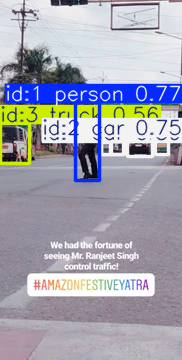


0: 640x352 1 person, 5 cars, 1 truck, 94.7ms
Speed: 1.6ms preprocess, 94.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


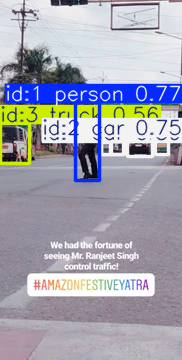


0: 640x352 1 person, 5 cars, 1 truck, 163.1ms
Speed: 1.6ms preprocess, 163.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


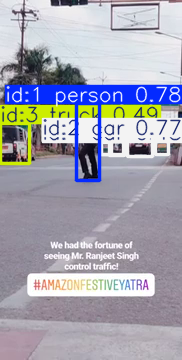


0: 640x352 1 person, 5 cars, 1 truck, 117.8ms
Speed: 1.7ms preprocess, 117.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


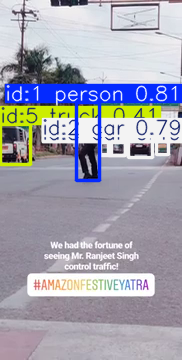


0: 640x352 1 person, 5 cars, 1 truck, 180.4ms
Speed: 1.6ms preprocess, 180.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


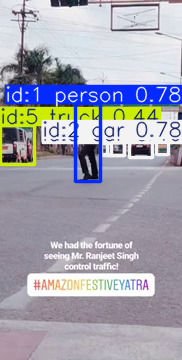


0: 640x352 1 person, 5 cars, 1 truck, 98.1ms
Speed: 1.7ms preprocess, 98.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


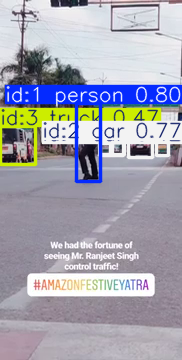


0: 640x352 1 person, 5 cars, 1 truck, 148.4ms
Speed: 1.6ms preprocess, 148.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


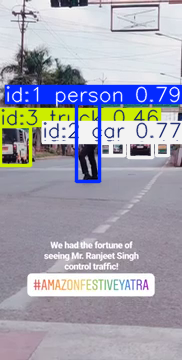


0: 640x352 2 persons, 4 cars, 1 truck, 98.4ms
Speed: 1.7ms preprocess, 98.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


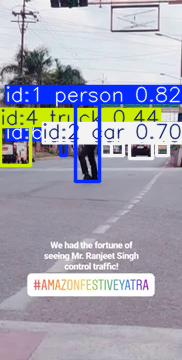


0: 640x352 1 person, 3 cars, 1 truck, 154.8ms
Speed: 1.4ms preprocess, 154.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


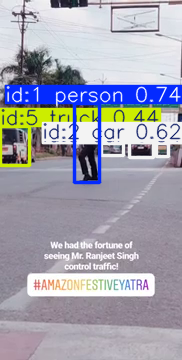


0: 640x352 1 person, 5 cars, 1 truck, 187.0ms
Speed: 1.5ms preprocess, 187.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


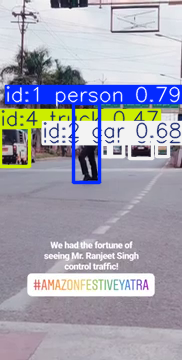


0: 640x352 1 person, 5 cars, 1 truck, 114.7ms
Speed: 1.6ms preprocess, 114.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


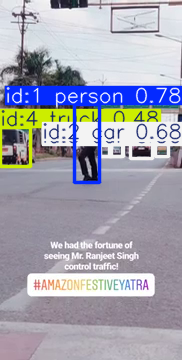


0: 640x352 1 person, 5 cars, 1 truck, 97.3ms
Speed: 1.5ms preprocess, 97.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


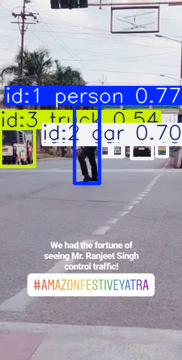


0: 640x352 1 person, 5 cars, 1 truck, 94.4ms
Speed: 1.5ms preprocess, 94.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


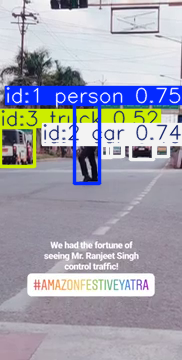


0: 640x352 1 person, 5 cars, 1 truck, 96.7ms
Speed: 1.6ms preprocess, 96.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


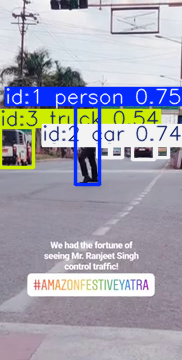


0: 640x352 1 person, 5 cars, 1 truck, 95.8ms
Speed: 1.5ms preprocess, 95.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


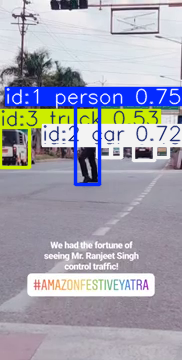


0: 640x352 1 person, 5 cars, 1 truck, 89.9ms
Speed: 1.5ms preprocess, 89.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


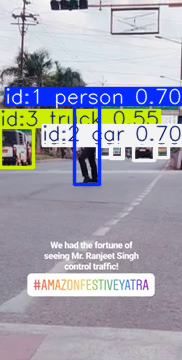


0: 640x352 1 person, 5 cars, 1 truck, 92.6ms
Speed: 1.5ms preprocess, 92.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


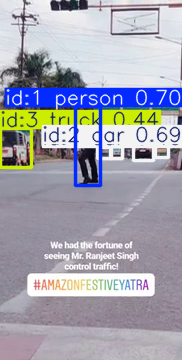


0: 640x352 1 person, 5 cars, 1 truck, 91.6ms
Speed: 1.5ms preprocess, 91.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


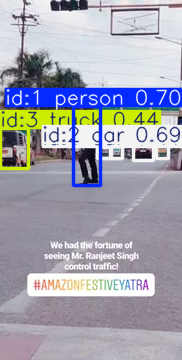


0: 640x352 1 person, 5 cars, 1 truck, 146.7ms
Speed: 1.5ms preprocess, 146.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


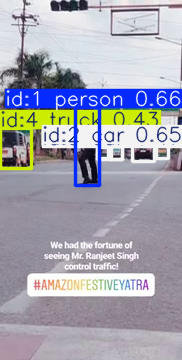


0: 640x352 1 person, 4 cars, 1 truck, 106.4ms
Speed: 1.5ms preprocess, 106.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


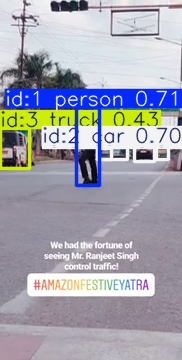


0: 640x352 1 person, 4 cars, 1 truck, 111.5ms
Speed: 1.6ms preprocess, 111.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


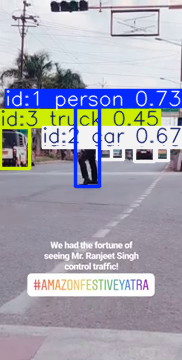


0: 640x352 2 persons, 5 cars, 1 truck, 100.2ms
Speed: 1.6ms preprocess, 100.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


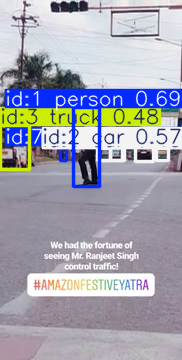


0: 640x352 2 persons, 5 cars, 1 truck, 97.2ms
Speed: 1.5ms preprocess, 97.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


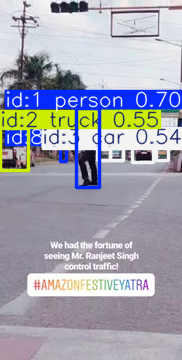


0: 640x352 2 persons, 5 cars, 1 truck, 95.2ms
Speed: 1.6ms preprocess, 95.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


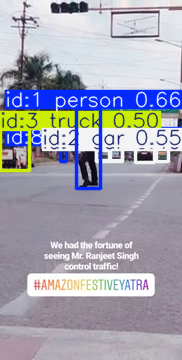


0: 640x352 1 person, 5 cars, 1 truck, 92.5ms
Speed: 1.5ms preprocess, 92.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


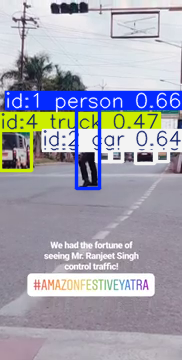


0: 640x352 1 person, 5 cars, 1 truck, 93.3ms
Speed: 1.7ms preprocess, 93.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


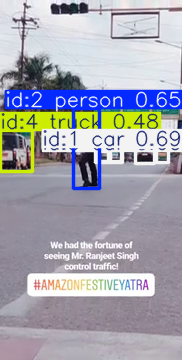


0: 640x352 1 person, 5 cars, 1 truck, 94.7ms
Speed: 1.5ms preprocess, 94.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


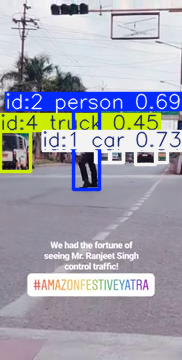


0: 640x352 1 person, 6 cars, 1 truck, 95.9ms
Speed: 1.7ms preprocess, 95.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


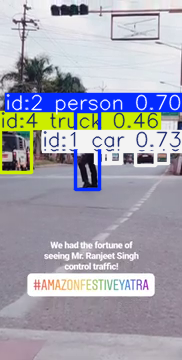


0: 640x352 1 person, 5 cars, 1 truck, 96.2ms
Speed: 1.8ms preprocess, 96.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


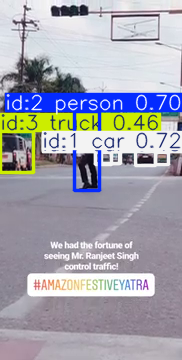


0: 640x352 2 persons, 5 cars, 1 truck, 92.5ms
Speed: 1.4ms preprocess, 92.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


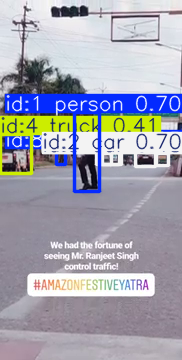


0: 640x352 2 persons, 4 cars, 1 truck, 93.4ms
Speed: 1.5ms preprocess, 93.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 352)


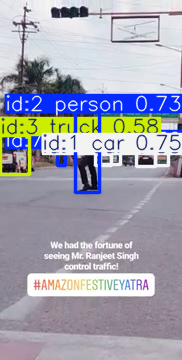


0: 640x352 1 person, 5 cars, 1 truck, 93.0ms
Speed: 1.4ms preprocess, 93.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


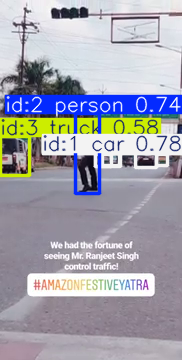


0: 640x352 1 person, 4 cars, 1 truck, 92.0ms
Speed: 1.4ms preprocess, 92.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


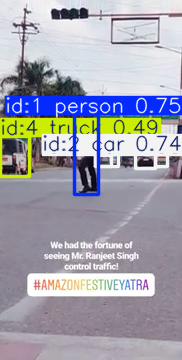


0: 640x352 1 person, 3 cars, 1 truck, 96.7ms
Speed: 1.5ms preprocess, 96.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


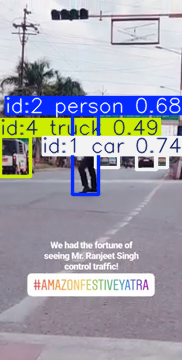


0: 640x352 1 person, 3 cars, 1 truck, 97.3ms
Speed: 1.6ms preprocess, 97.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


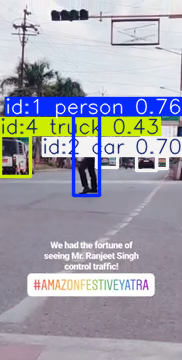


0: 640x352 1 person, 4 cars, 1 truck, 92.5ms
Speed: 1.5ms preprocess, 92.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


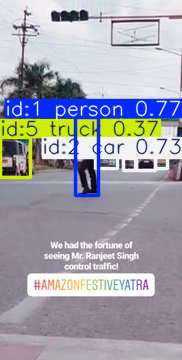


0: 640x352 1 person, 4 cars, 1 truck, 94.8ms
Speed: 1.5ms preprocess, 94.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


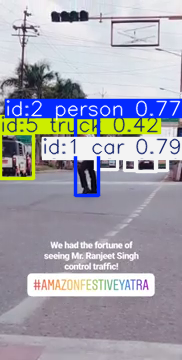


0: 640x352 1 person, 3 cars, 1 truck, 96.4ms
Speed: 1.6ms preprocess, 96.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


KeyboardInterrupt: 

In [8]:
import cv2
import yt_dlp
import tempfile


video_url = "https://youtube.com/shorts/0QtaOz52YB0?si=UxlMgaD6pxOaDYKl"
ydl_opts = {
    'format': 'best[ext=mp4]',
    'outtmpl': tempfile.gettempdir() + "/youtube_video.mp4",
}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([video_url])

video_path = tempfile.gettempdir() + "/youtube_video.mp4"

cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.track(frame, persist=True)

    annotated_frame = results[0].plot()

    # cv2.imshow("YOLO Object Tracking", annotated_frame) It will not work in collab but will work in local

    from google.colab.patches import cv2_imshow
    cv2_imshow(annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


**Working With WebCam (Will not work in Collab)**

In [15]:
cap = cv2.VideoCapture(0)

cap.set(3, 640)
cap.set(4, 480)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.track(frame, persist=True)

    annotated_frame = results[0].plot()

    cv2.imshow("YOLO Object Tracking", annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

**Training on Custom Data**

To Train on Custom data , i need annotated data which i don't have for now